<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [11]:
from sklearn.model_selection import GridSearchCV

def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None  

    model = SVC()
    print "Trying model {}".format(model)
    
    param_grid = [
        {'kernel': ['linear', 'rbf', 'sigmoid'], 
                  'C': [0.1, 1, 10, 100, 1000, 10000], 
                  },
                  {'kernel': ['poly'], 
                   'C': [0.1, 1, 10, 100, 1000, 10000],
                   'degree': [2, 3]}
        ]
    grid = GridSearchCV(model, param_grid).fit(x, y)   
    
    best_model = grid.best_estimator_   
    best_accuracy = grid.best_score_
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [12]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.930000
Plotting data set points
Plotting decision region


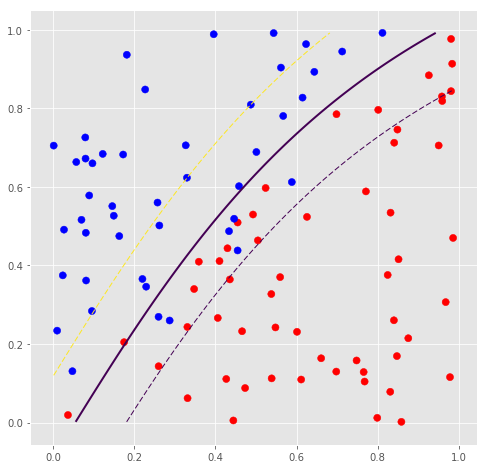

In [13]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.990000
Plotting data set points
Plotting decision region


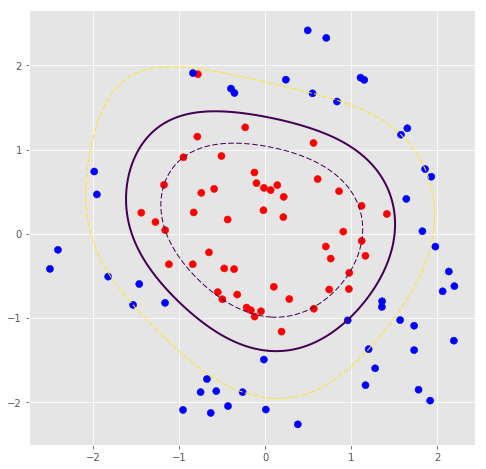

In [14]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.960000
Plotting data set points
Plotting decision region


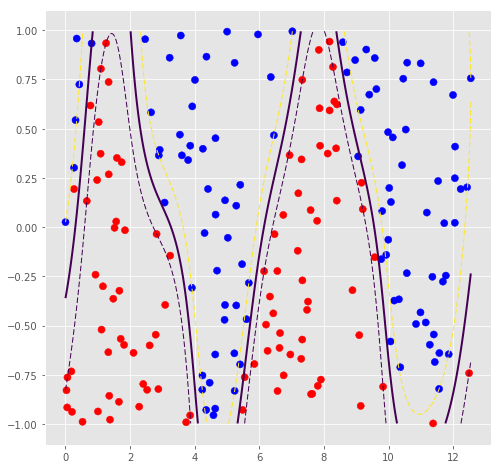

In [15]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

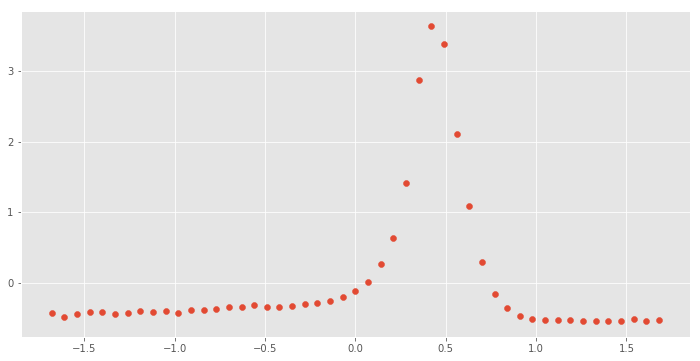

In [27]:
data = pd.read_csv('titanium.csv')
data_norm = (data - data.mean()).div(data.std())
X = data_norm.values[:,0]
y = data_norm.values[:,1]
plt.scatter(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [26]:
from sklearn.metrics import mean_absolute_error

Линейное ядро

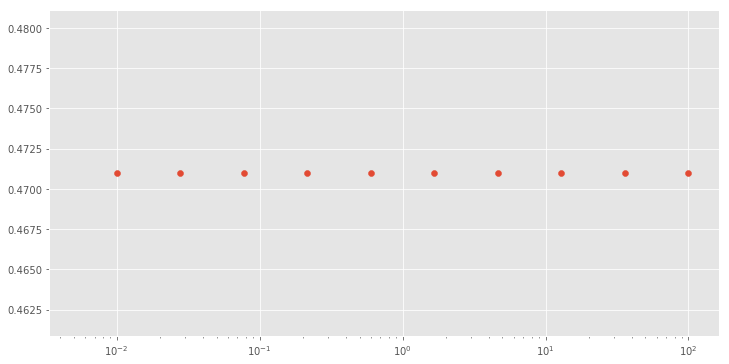

In [45]:
loss = []
for C in np.logspace(-2, 2, 10):
    model = SVR(kernel='linear', epsilon=0.01, C=C).fit(X.reshape(-1,1), y)
    predicted = model.predict(X.reshape(-1,1))
    loss.append(mean_absolute_error(y, predicted))

plt.scatter(np.logspace(-2, 2, 10), loss)
plt.xscale('log')

Видно, что ошибка не зависит от С, поэтому возьмем С = 1  (ошибка = 0.47)

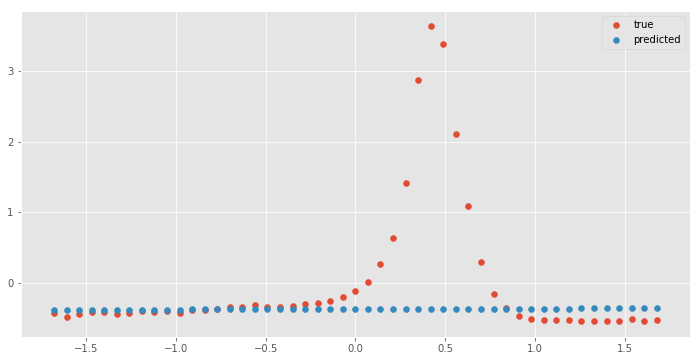

In [57]:
model = SVR(kernel='linear', epsilon=0.01, C=1).fit(X.reshape(-1,1), y)  #обучаемся
predicted = model.predict(X.reshape(-1,1))                               #предсказываем
plt.scatter(X, y, label='true')
plt.scatter(X, predicted, label='predicted')
plt.legend()

С линейным ядром все плохо.<br>Полиномиальное ядро:

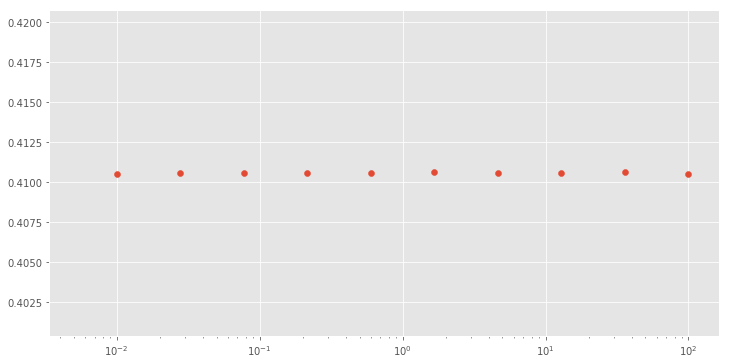

In [49]:
loss = []
for C in np.logspace(-2, 2, 10):
    model = SVR(kernel='poly', epsilon=0.01, C=C, degree = 3, gamma = 6, coef0 = 1).fit(X.reshape(-1,1), y)
    predicted = model.predict(X.reshape(-1,1))
    loss.append(mean_absolute_error(y, predicted))

plt.scatter(np.logspace(-2, 2, 10), loss)
plt.xscale('log')

С = 100  (ошибка = 0.41)

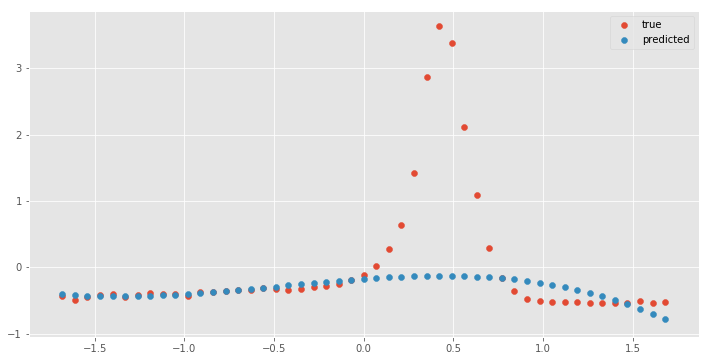

In [60]:
model = SVR(kernel='poly', epsilon=0.01, C=100, degree = 3, gamma = 6, coef0 = 1).fit(X.reshape(-1,1), y)
predicted = model.predict(X.reshape(-1,1))                 
plt.scatter(X, y, label='true')
plt.scatter(X, predicted, label='predicted')
plt.legend()

RBF-ядро:

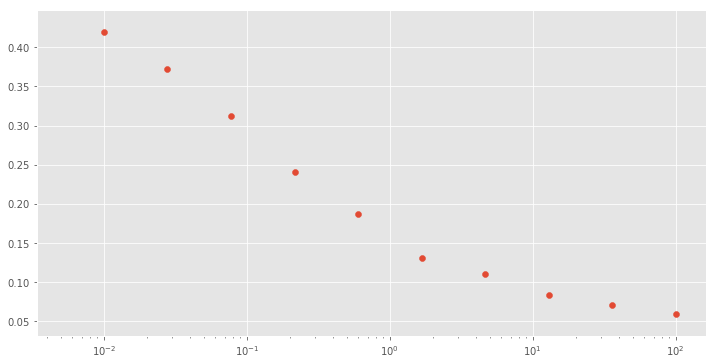

In [51]:
loss = []
for C in np.logspace(-2, 2, 10):
    model = SVR(kernel='rbf', epsilon=0.01, C=C, gamma = 6, coef0 = 1).fit(X.reshape(-1,1), y)
    predicted = model.predict(X.reshape(-1,1))
    loss.append(mean_absolute_error(y, predicted))

plt.scatter(np.logspace(-2, 2, 10), loss)
plt.xscale('log')

Возьмем С = 100, при этом ошибка = 0.06, что практически на порядок меньше, чем для других ядер:

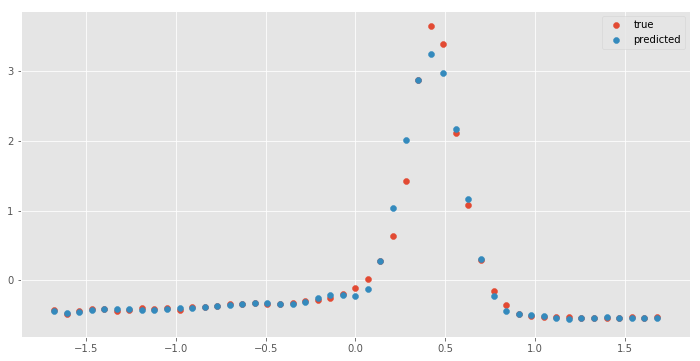

In [59]:
model = SVR(kernel='rbf', epsilon=0.01, C=100, gamma = 6, coef0 = 1).fit(X.reshape(-1,1), y)
predicted = model.predict(X.reshape(-1,1))                 
plt.scatter(X, y, label='true')
plt.scatter(X, predicted, label='predicted')
plt.legend()

<b>Вывод:</b> гауссово ядро дает хорошую точность, линейное и полиномиальное - нет.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [68]:
df_en = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])
df_es = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
df_en['label'] = np.zeros(len(df_en), dtype=int)
df_es['label'] = np.ones(len(df_es), dtype=int)
print len(df_en), len(df_es)
df_en.head()

5044 6359


,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


In [69]:
frames = [df_en, df_es] 
df = pd.concat(frames)
print len(df)
df.head()

11403


,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
RND_SEED = 1

In [70]:
df_new = df.sample(frac=1)
df_new = df_new.reset_index()
df_small = df_new[:1000]

In [71]:
df_new.head()

,index,word,label
0,4225,era,1
1,2637,been,0
2,3775,too,0
3,3017,begin,0
4,3364,right,0


In [124]:
X = df_small.loc[:,'index'].values[:,np.newaxis]
y = df_small.loc[:,'label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED)
print len(X_train), len(X_test)

600 400


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

В качестве расстояния между словами будем использовать расстояние Левенштейна. Ядро - rbf:

In [12]:
from Levenshtein import distance

W - словарь всех слов, в качестве ключа - индекс слова:

In [88]:
W = df_new.loc[:,['index', 'word']].set_index('index').to_dict(orient='dict')['word']
W[4888]

'sur'

Вспомогательная функция для расчета ядра - принимает на вход два массива объектов (индексов слов) размером (число объектов, кол-во признаков=1), а также словарь со всеми словами W:

In [159]:
def string_by_word_kernel(U, V, W):
    '''
    W - словарь с индексами всех слов
    '''
    G = np.empty((len(U), len(V)), dtype=np.float64)
    gamma = 0.1
    for i, x in enumerate(U):
        w1 = W[x[0]]
        for j, y in enumerate(V):         
            w2 = W[y[0]]
            G[i, j] = np.exp(-gamma*distance(w1, w2)**2)
    return G

Функция ядра в том виде, в каком она может быть использована в sklearn. Словарь всех слов передается как дополнительный аргумент через partial:

In [160]:
from functools import partial

string_kernel = partial(string_by_word_kernel, W=W)
G = string_kernel(X_train, X_train)

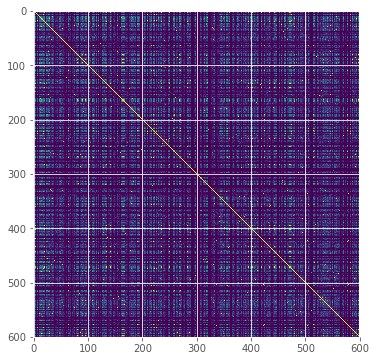

In [161]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [131]:
from sklearn.metrics import accuracy_score

In [162]:
cls = SVC(kernel=string_kernel)
cls = cls.fit(X_test, y_test)

In [163]:
lbl = cls.predict(X_train)

In [164]:
accuracy_score(y_train, lbl)

0.66166666666666663